# Sentiment Analysis

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
portable_df = pd.read_csv("data/news_title_only.csv", nrows = 50000)
portable_df.head()

,title,published_date,source,section,language
0,U.S. will not lift sanctions to get Iran to ne...,2021-02-08T02:51:00.000Z,The Star,world,english
1,German SPD targets climate-neutral economy in ...,2021-02-08T02:05:00.000Z,The Star,world,english
2,Ireland open to modest extensions to Northern ...,2021-02-07T14:16:32Z,Reuters,world,english
3,The Next Technology Counter To Fly After YBS (...,2021-02-08T02:41:22+0800,klse.i3investor,business,english
4,Reagan’s longtime secretary of state George Sh...,2021-02-06T16:00:00+00:00,The National,world,english


In [39]:
portable_df.tail()

,title,published_date,source,section,language
49995,Going distance for charity | Borneo Post Online,2020-10-19T23:50:19+00:00,The Borneo Post,local,english
49996,"57,329 food baskets distributed in 11 district...",2020-10-19T23:47:14+00:00,The Borneo Post,local,english
49997,Sabah in dire need of aid - Anwar | Borneo Pos...,2020-10-19T23:45:30+00:00,The Borneo Post,local,english
49998,Speed up economic revival plans - SME Sabah | ...,2020-10-19T23:42:52+00:00,The Borneo Post,local,english
49999,Ministry to revamp curriculum,2020-10-20T00:08:11.905342+00:00,Bangkok Post,world,english


In [13]:
portable_df[['source', 'section', 'language']].nunique()

source      63
section      4
language     3
dtype: int64

In [15]:
portable_df['source'].unique()

array(['The Star', 'Reuters', 'klse.i3investor', 'The National',
       'The Wall Street Journal', 'BBC', 'The Sun Daily',
       'New Straits Times', 'Sinchew', 'Berita Harian',
       'Free Malaysia Today', 'National Review', 'Inquirer.net',
       'The Jakarta Post', 'The Malaysian Reserve', 'Malaymail',
       'The Hacker News', 'Daily Express', 'Wired', 'The Edge Markets',
       'The Borneo Post', 'The Malaysian Insight', 'Bangkok Post',
       'Astro Awani', 'South China Morning Post', 'CNBC', 'Harian Metro',
       'Security Week', 'CNN Business', 'Malaysiakini', 'Soyacincau',
       'Politico', 'Hong Kong Monetary Authority', 'Says', 'McKinsey',
       'The Atlantic', 'paultan.org', 'The Diplomat',
       'Central Bank of Ireland', 'Council on Foreign Relations',
       'Business Continuity Institute', 'Security Magazine',
       'Central Bank News', 'Financial Consumer Agency of Canada',
       'Threat Post', 'MPOB Palm News',
       'Australian Securities and Investments Com

In [45]:
portable_df['published_date'][1]

datetime.datetime(2021, 2, 8, 2, 5, tzinfo=tzutc())

In [56]:
portable_df['published_date'] = pd.to_datetime(portable_df['published_date'], utc=True)
# add a column for Year
#portable_df.dtypes
portable_df['Year'] = portable_df['published_date'].dt.year

In [126]:
portable_df.sort_values(by='published_date', inplace=True)
portable_df.isnull().sum()

title               1
published_date    154
source             16
section            16
language           16
dtype: int64

In [128]:
portable_df.tail()

,title,published_date,source,section,language
46255,Why email needs a zero-trust security model,NaN,Security Magazine,world,english
46256,Packet capture and analysis: The force multipl...,NaN,Security Magazine,world,english
46257,Why application-layer security is critical in ...,NaN,Security Magazine,world,english
46258,"The year in ransomware: Key targets, extortion...",NaN,Security Magazine,world,english
49424,What the Bad Neighbor vulnerability means for ...,NaN,Security Magazine,world,english


In [62]:
portable_no = portable_df.dropna()
portable_no.tail()

,title,published_date,source,section,language,Year
39882,Wanita muda mula kuasai sektor didominasi lelaki,2021-03-15 08:27:22+00:00,Harian Metro,business,malay,2021.0
39916,Belanda tangguh guna vaksin AstraZeneca,2021-03-15 08:29:34+00:00,Harian Metro,world,malay,2021.0
39946,"Trading ideas: Lay Hong, Seacera, Dataprep, Su...",2021-03-15 08:40:00+00:00,The Star,business,english,2021.0
39856,Police report lodged over alleged Covid-19 SOP...,2021-03-15 08:44:00+00:00,The Star,local,english,2021.0
33621,Malaysia’s January unemployment rate rises sli...,2077-03-09 14:51:00+00:00,The Sun Daily,business,english,2077.0


In [53]:
portable_df['Year'].unique()

array([2021.,   nan, 2018., 2020., 2019., 2017., 2077., 2016.])

<AxesSubplot:xlabel='count', ylabel='source'>

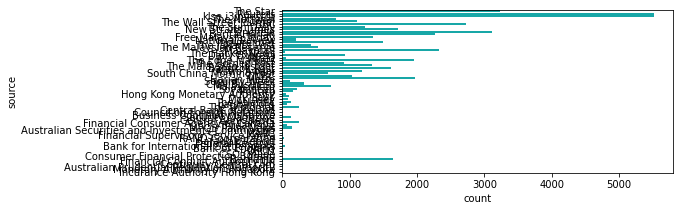

In [23]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y='source', data=portable_df, color="c")

In [34]:
big_files  = pd.read_csv("data/news_title_only.csv")
print(f"number of rows : {big_files.shape[0]}.")
print(f'missing values : {big_files.isna().sum()/len(big_files)}.')
print(big_files.info())

C:\Users\Hazrul Akmal\AppData\Local\Temp\ipykernel_10476\276099283.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  big_files  = pd.read_csv("data/news_title_only.csv")


number of rows : 10587183.
missing values : title             0.000006
published_date    0.773161
source            0.772970
section           0.772970
language          0.772970
dtype: float64.


In [130]:
10587183*0.23

2435052.0900000003

In [70]:
clean = big_files.dropna(axis=0, subset=["published_date","title"])
clean.shape

(2401520, 5)

In [71]:
clean.isnull().sum()

title             0
published_date    0
source            0
section           0
language          0
dtype: int64

In [75]:
#clean['published_date'] = pd.to_datetime(clean['published_date'], utc=True)
# add a column for Year
clean.sort_values(by='published_date', inplace=True)
clean.isnull().sum()

C:\Users\Hazrul Akmal\AppData\Local\Temp\ipykernel_10476\1324640294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.sort_values(by='published_date', inplace=True)


title             0
published_date    0
source            0
section           0
language          0
dtype: int64

In [108]:
#dates from news straight time are inconsistent
def extract_dates(date):
    """remove date typo"""
    date = str(date)[:10]
    if date[0] == "2" or date[:2] == "19":
        return date
    else:
        return None

clean["published_date_clean"] = [extract_dates(date) for date in clean["published_date"]]
clean.isnull().sum()

C:\Users\Hazrul Akmal\AppData\Local\Temp\ipykernel_10476\1760281744.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["published_date_clean"] = [extract_dates(date) for date in clean["published_date"]]


title                      0
published_date             0
source                     0
section                    0
language                   0
published_date_clean    4669
dtype: int64

In [109]:
cleaner = clean.dropna()
cleaner['published_date_clean'] = pd.to_datetime(cleaner['published_date_clean'])
cleaner.sort_values(by="published_date_clean")
cleaner.tail()

C:\Users\Hazrul Akmal\AppData\Local\Temp\ipykernel_10476\4282838724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaner['published_date_clean'] = pd.to_datetime(cleaner['published_date_clean'])


,title,published_date,source,section,language,published_date_clean
10586403,BNM's international reserve at US$109 bil as a...,2022-07-07T16:05:00+08:00,The Edge Markets,business,english,2022-07-07
10587123,New UK finance minister Zahawi says PM Johnson...,2022-07-07T16:05:38+08:00,Channel News Asia,world,english,2022-07-07
10587075,ASEAN Envoy Hails ‘Some Progress’ on Second My...,2022-07-07T16:15:44+00:00,The Diplomat,world,english,2022-07-07
9731254,IHH Healthcare weighing US$1 billion sale of C...,2022-11-22T21:35:00+08:00,The Edge Markets,business,english,2022-11-22
33621,Malaysia’s January unemployment rate rises sli...,2077-03-09T14:51:00+00:00,The Sun Daily,business,english,2077-03-09


C:\Users\Hazrul Akmal\AppData\Local\Temp\ipykernel_10476\3026083020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaner["year"] = cleaner["published_date_clean"].dt.year


<AxesSubplot:xlabel='count', ylabel='year'>

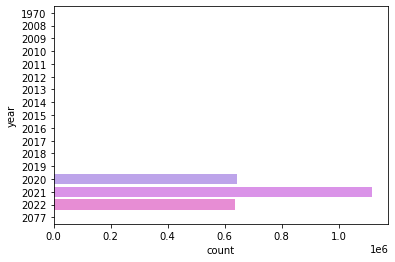

In [112]:
cleaner["year"] = cleaner["published_date_clean"].dt.year
sns.countplot(y="year", data=cleaner)

In [124]:
cleaner["language"].value_counts()

english    1997901
malay       251903
chinese     147047
Name: language, dtype: int64

In [123]:
cleaner["year"].value_counts()

2021    1118008
2020     643293
2022     634971
2019        325
2018        114
2017         62
2014         22
2016         14
2010          8
2015          7
2009          7
2013          7
2011          6
2012          4
1970          1
2008          1
2077          1
Name: year, dtype: int64

<AxesSubplot:>

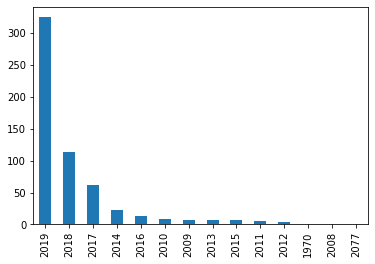

In [122]:
cleaner[(cleaner["year"] != 2022) & (cleaner["year"] != 2021) & (cleaner["year"] != 2020)]["year"].value_counts().plot(kind="bar")

In [129]:
english = cleaner[cleaner["language"]=="english"]
english.shape

(1997901, 7)

In [132]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
classifier(["help me! i dont know what to do", "I love my job"])

Downloading: 100%|██████████| 687/687 [00:00<00:00, 137kB/s]
Downloading: 100%|██████████| 1.32G/1.32G [01:53<00:00, 12.5MB/s]
Downloading: 100%|██████████| 256/256 [00:00<00:00, 13.5kB/s]
Downloading: 100%|██████████| 780k/780k [00:01<00:00, 497kB/s]  
Downloading: 100%|██████████| 446k/446k [00:01<00:00, 347kB/s]  
Downloading: 100%|██████████| 150/150 [00:00<00:00, 30.0kB/s]


[{'label': 'NEGATIVE', 'score': 0.9992088675498962},
 {'label': 'POSITIVE', 'score': 0.9988622665405273}]

In [136]:
pred = classifier(english["title"][:100].to_list())
pred[:10]

[{'label': 'POSITIVE', 'score': 0.9980159997940063},
 {'label': 'POSITIVE', 'score': 0.9973478317260742},
 {'label': 'POSITIVE', 'score': 0.9980508089065552},
 {'label': 'POSITIVE', 'score': 0.9982903599739075},
 {'label': 'NEGATIVE', 'score': 0.9979909658432007},
 {'label': 'POSITIVE', 'score': 0.9706594944000244},
 {'label': 'POSITIVE', 'score': 0.9957699179649353},
 {'label': 'POSITIVE', 'score': 0.9973505735397339},
 {'label': 'NEGATIVE', 'score': 0.9994246959686279},
 {'label': 'NEGATIVE', 'score': 0.9990830421447754}]

In [139]:
english.to_csv("data/english_news.csv", index=False)

In [138]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

Downloading: 100%|██████████| 226k/226k [00:00<00:00, 232kB/s]  
Downloading: 100%|██████████| 28.0/28.0 [00:00<00:00, 14.0kB/s]
Downloading: 100%|██████████| 483/483 [00:00<00:00, 243kB/s]
Downloading: 100%|██████████| 256M/256M [00:19<00:00, 14.0MB/s] 
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model

'LABEL_0'

In [32]:
big_files.dtypes

title       object
source      object
section     object
language    object
dtype: object

In [27]:
print(big_files.iloc[0,:])
print(big_files.iloc[-1,:])

title       U.S. will not lift sanctions to get Iran to ne...
source                                               The Star
section                                                 world
language                                              english
Name: 2021-02-08T02:51:00.000Z, dtype: object
title       Euro continues to slide toward dollar parity —...
source                                                   CNBC
section                                                 world
language                                              english
Name: 2022-07-07T08:06:51+00:00, dtype: object


In [26]:
big_files.sort_index()
big_files.head()

,title,source,section,language
published_date,,,,
2021-02-08T02:51:00.000Z,U.S. will not lift sanctions to get Iran to ne...,The Star,world,english
2021-02-08T02:05:00.000Z,German SPD targets climate-neutral economy in ...,The Star,world,english
2021-02-07T14:16:32Z,Ireland open to modest extensions to Northern ...,Reuters,world,english
2021-02-08T02:41:22+0800,The Next Technology Counter To Fly After YBS (...,klse.i3investor,business,english
2021-02-06T16:00:00+00:00,Reagan’s longtime secretary of state George Sh...,The National,world,english
